<a href="https://colab.research.google.com/github/MarceloTisera/DiploDataScience/blob/master/platzy%20reconocimiento%20raza%20de%20perro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

from torchvision import utils
from torchvision import models
from torchvision import datasets
from torchvision import transforms

from PIL import Image
import urllib.request as request
from matplotlib import pyplot as plt

# Modelo pre-entrenado

---



In [2]:
inception = models.inception_v3(pretrained=True)

Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-1a9a5a14.pth


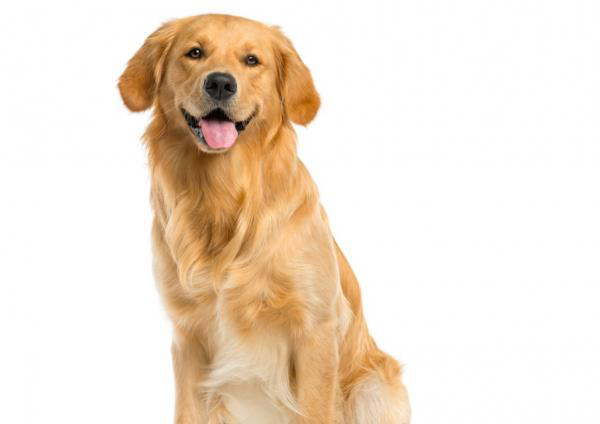

In [4]:
url = 'https://t2.ea.ltmcdn.com/es/razas/5/5/0/img_55_golden-retriever-o-cobrador-dorado_0_600.jpg'
image = request.urlretrieve(url, 'test.jpg')
img = Image.open(image[0])
img

In [5]:
preprocess = transforms.Compose([
    transforms.Resize(128),
    transforms.CenterCrop(128),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


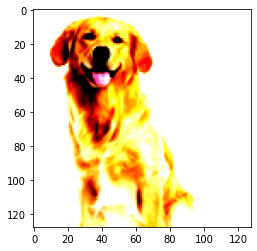

In [6]:
img_t = preprocess(img)
batch = torch.unsqueeze(img_t, 0)
plt.imshow(img_t.permute(1, 2, 0))

In [7]:
inception.eval()

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

In [8]:
out = inception(batch)
out

tensor([[ 3.2139e+00,  1.0781e+00,  5.3574e+00, -2.5386e+00,  3.0597e-01,
          1.8210e-01,  7.0654e-01, -2.2998e+00, -9.7766e-01, -2.6797e+00,
         -6.1432e+00, -4.6080e+00, -2.0422e+00, -1.1825e+00,  3.2038e+00,
         -3.3835e+00, -2.0995e+00, -4.5597e-01,  1.3482e+00, -7.1598e-01,
         -1.3018e+01, -3.6663e+00,  2.1849e-03,  3.6303e+00, -7.3299e+00,
          2.4684e+00,  8.8673e+00,  1.1030e+01,  1.7037e+00, -2.7159e+00,
          2.9242e+00,  1.6440e+00,  1.0901e+00,  1.5258e-01,  6.0560e-01,
         -6.0234e+00, -6.6616e+00,  5.7636e+00,  4.7587e+00, -4.5548e+00,
         -3.0458e+00, -2.8507e+00,  7.6942e+00, -4.4290e+00, -3.6313e+00,
         -7.2023e+00, -1.9878e+00, -3.3115e+00, -4.5864e+00, -2.6267e+00,
         -2.8468e+00,  4.8381e-01, -9.2609e+00, -4.1899e+00, -1.0347e+01,
         -2.6121e+00, -8.4932e+00,  8.4614e+00, -5.2075e+00, -5.9206e+00,
         -5.6662e+00, -6.7344e+00, -1.3416e+00, -1.0848e+00,  1.1917e+00,
         -5.2301e+00, -7.4429e+00, -4.

In [9]:
request.urlretrieve('https://gist.githubusercontent.com/ykro/acb00a36f737c12013f6e0f8a0d2cb61/raw/a2bb113b83e274048992f6550050a437fa4db76d/imagenet_classes.txt', 'labels.txt')
with open('labels.txt') as f:
    labels = [line.strip() for line in f.readlines()]

In [10]:
out

tensor([[ 3.2139e+00,  1.0781e+00,  5.3574e+00, -2.5386e+00,  3.0597e-01,
          1.8210e-01,  7.0654e-01, -2.2998e+00, -9.7766e-01, -2.6797e+00,
         -6.1432e+00, -4.6080e+00, -2.0422e+00, -1.1825e+00,  3.2038e+00,
         -3.3835e+00, -2.0995e+00, -4.5597e-01,  1.3482e+00, -7.1598e-01,
         -1.3018e+01, -3.6663e+00,  2.1849e-03,  3.6303e+00, -7.3299e+00,
          2.4684e+00,  8.8673e+00,  1.1030e+01,  1.7037e+00, -2.7159e+00,
          2.9242e+00,  1.6440e+00,  1.0901e+00,  1.5258e-01,  6.0560e-01,
         -6.0234e+00, -6.6616e+00,  5.7636e+00,  4.7587e+00, -4.5548e+00,
         -3.0458e+00, -2.8507e+00,  7.6942e+00, -4.4290e+00, -3.6313e+00,
         -7.2023e+00, -1.9878e+00, -3.3115e+00, -4.5864e+00, -2.6267e+00,
         -2.8468e+00,  4.8381e-01, -9.2609e+00, -4.1899e+00, -1.0347e+01,
         -2.6121e+00, -8.4932e+00,  8.4614e+00, -5.2075e+00, -5.9206e+00,
         -5.6662e+00, -6.7344e+00, -1.3416e+00, -1.0848e+00,  1.1917e+00,
         -5.2301e+00, -7.4429e+00, -4.

In [11]:
_, index = torch.max(out, 1)

In [12]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('golden retriever', 99.99612426757812)

In [13]:
_, indices = torch.sort(out, descending=True)

top_five = indices[0][:5]
for i in top_five:
  print(labels[i], percentage[i].item())

golden retriever 99.99612426757812
Labrador retriever 0.0038796025328338146
Rhodesian ridgeback 2.3983516257430892e-06
redbone 1.1458116400131502e-10
kuvasz 7.335437595887284e-13


# Trabajando con un dataset

---



In [ ]:
data_path = 'data/'
dataset = datasets.CIFAR10(data_path, train=True, download=True)
validation_set = datasets.CIFAR10(data_path, train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
classes = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']


In [ ]:
len(dataset)

50000

In [ ]:
img, label = dataset[50]
img, label, classes[label]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7FAB6004ED68>, 9, 'truck')

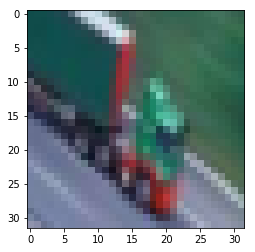

In [ ]:
plt.imshow(img)

In [ ]:
tensor_transform = transforms.ToTensor()

img_tensor = tensor_transform(img)

img, img_tensor, img_tensor.shape

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7FAB6004ED68>,
 tensor([[[0.0627, 0.0667, 0.0667,  ..., 0.2431, 0.2157, 0.2000],
          [0.0627, 0.0627, 0.0588,  ..., 0.2431, 0.2275, 0.2039],
          [0.0627, 0.0588, 0.0588,  ..., 0.2235, 0.2314, 0.2196],
          ...,
          [0.3765, 0.4471, 0.4667,  ..., 0.5020, 0.4706, 0.4588],
          [0.4627, 0.3922, 0.4471,  ..., 0.5451, 0.5137, 0.4745],
          [0.5647, 0.5333, 0.4118,  ..., 0.5686, 0.5373, 0.5137]],
 
         [[0.2980, 0.3020, 0.3020,  ..., 0.4157, 0.3882, 0.3686],
          [0.2980, 0.2980, 0.2941,  ..., 0.4275, 0.4118, 0.3922],
          [0.2980, 0.2941, 0.2941,  ..., 0.4314, 0.4353, 0.4275],
          ...,
          [0.4314, 0.4980, 0.5176,  ..., 0.5294, 0.5098, 0.5137],
          [0.5176, 0.4431, 0.4941,  ..., 0.5725, 0.5490, 0.5255],
          [0.5804, 0.5490, 0.4471,  ..., 0.5922, 0.5647, 0.5529]],
 
         [[0.2902, 0.2941, 0.2941,  ..., 0.3412, 0.3137, 0.2941],
          [0.2902, 0.2902, 0.2902,  ..., 0

In [ ]:
dataset = datasets.CIFAR10(data_path, train=True, download=True, transform=transforms.ToTensor())

Files already downloaded and verified


In [ ]:
img, label = dataset[50]
img

tensor([[[0.0627, 0.0667, 0.0667,  ..., 0.2431, 0.2157, 0.2000],
         [0.0627, 0.0627, 0.0588,  ..., 0.2431, 0.2275, 0.2039],
         [0.0627, 0.0588, 0.0588,  ..., 0.2235, 0.2314, 0.2196],
         ...,
         [0.3765, 0.4471, 0.4667,  ..., 0.5020, 0.4706, 0.4588],
         [0.4627, 0.3922, 0.4471,  ..., 0.5451, 0.5137, 0.4745],
         [0.5647, 0.5333, 0.4118,  ..., 0.5686, 0.5373, 0.5137]],

        [[0.2980, 0.3020, 0.3020,  ..., 0.4157, 0.3882, 0.3686],
         [0.2980, 0.2980, 0.2941,  ..., 0.4275, 0.4118, 0.3922],
         [0.2980, 0.2941, 0.2941,  ..., 0.4314, 0.4353, 0.4275],
         ...,
         [0.4314, 0.4980, 0.5176,  ..., 0.5294, 0.5098, 0.5137],
         [0.5176, 0.4431, 0.4941,  ..., 0.5725, 0.5490, 0.5255],
         [0.5804, 0.5490, 0.4471,  ..., 0.5922, 0.5647, 0.5529]],

        [[0.2902, 0.2941, 0.2941,  ..., 0.3412, 0.3137, 0.2941],
         [0.2902, 0.2902, 0.2902,  ..., 0.3294, 0.3137, 0.2941],
         [0.2902, 0.2863, 0.2863,  ..., 0.3098, 0.3137, 0.

In [ ]:
img.min(), img.max()

(tensor(0.0314), tensor(0.9529))

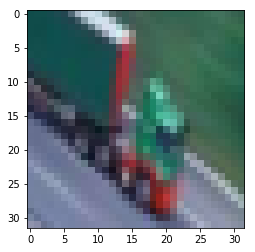

In [ ]:
plt.imshow(img.permute(1, 2, 0))

In [ ]:
imgs = torch.stack([img_tensor for img_tensor, _ in dataset], dim=3)

In [ ]:
imgs.shape

torch.Size([3, 32, 32, 50000])

In [ ]:
imgs.view(3, -1).mean(dim=1)

tensor([0.4915, 0.4823, 0.4468])

In [ ]:
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [ ]:
transform = transforms.Compose(
              [transforms.ToTensor(),
               transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))
              ])


In [ ]:
dataset = datasets.CIFAR10(data_path, train=True, download=True, transform=transform)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'frog'

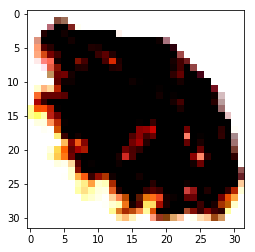

In [ ]:
img_transformed,label = dataset[125]

plt.imshow(img_transformed.permute(1, 2, 0))
classes[label]